# **게임 데이터 분석**
 * 다음분기 신작 발표를 위해 
 장르, 지역, 플랫폼에 대해 알아보자


# EDA

In [1]:
## 필요한 라이브러리 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
## 데이터프레임 불러오기 
url = '/content/drive/MyDrive/Colab Notebooks/vgames2.csv'

df = pd.read_csv(url)
df.drop('Unnamed: 0', axis=1,inplace=True)

df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


Name : 게임의 이름 

Platform : 게임이 지원되는 플랫폼의 이름

Year : 게임이 출시된 연도

Genre : 게임의 장르

Publisher : 게임을 제작한 회사

NA_Sales : 북미지역 출고량

EU_Sales : 유럽지역 출고량

JP_Sales : 일본지역 출고량

Other_Sales : 기타지역 출고량

In [3]:
## 스트링 없애고 float 타입으로. 기본 단위 M으로 설정 (백만)
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    elif 'K' in x :
      return float(x.replace('K', '')) * 0.001
    elif 'M' in x :
      return float(x.replace('M', ''))
    elif type(x) == str:
      return float(x)

## sales 컬럼 단위통일 
df['NA_Sales'] = df['NA_Sales'].apply(value_to_float)
df['EU_Sales'] = df['EU_Sales'].apply(value_to_float)
df['JP_Sales'] = df['JP_Sales'].apply(value_to_float)
df['Other_Sales']= df['Other_Sales'].apply(value_to_float)


In [4]:
## 총판매량 계산 
df['total_sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [5]:
## year 결측치 확인
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
total_sales      0
dtype: int64

In [6]:
# year 이상치 확인 
df['Year'].value_counts()  

2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
          ... 
14.0         2
13.0         2
94.0         1
2020.0       1
86.0         1
Name: Year, Length: 62, dtype: int64

In [7]:
# 결측치, 이상치 제거 
df = df.dropna()
df = df[df['Year'] >= 1980]

print(df.isnull().sum())
print(df['Year'].value_counts())

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
total_sales    0
dtype: int64
2009.0    1418
2008.0    1413
2010.0    1246
2007.0    1192
2011.0    1123
2006.0     998
2005.0     930
2002.0     823
2003.0     767
2004.0     736
2012.0     650
2015.0     606
2014.0     578
2013.0     543
2001.0     478
1998.0     374
2000.0     345
2016.0     337
1999.0     336
1997.0     287
1996.0     259
1995.0     215
1994.0     120
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      20
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       8
2017.0       3
2020.0       1
Name: Year, dtype: int64


In [8]:
## 총판매량 순으로 정렬 및 리셋 인덱스 
df = df.sort_values('total_sales', ascending=False)

# 순위 컬럼 추가 후 인덱스 설정 : 보기 편하게 하려고  
num_lst = list(range(1,16142))
df['rank'] = num_lst
df = df.set_index(df['rank'])
df.drop('rank', axis=1, inplace=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total_sales
rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
16137,Ultimate Puzzle Games,GBA,2005.0,Puzzle,Telegames,0.01,0.00,0.00,0.00,0.01
16138,Monster Rancher Advance 2,GBA,2002.0,Simulation,Tecmo Koei,0.01,0.00,0.00,0.00,0.01
16139,Myst,PSP,2006.0,Adventure,Midway Games,0.00,0.01,0.00,0.00,0.01


# 연도에 따른 트렌드  

In [9]:
## 장르 컬럼 값들 확인 
df['Genre'].sort_values(ascending=True).unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

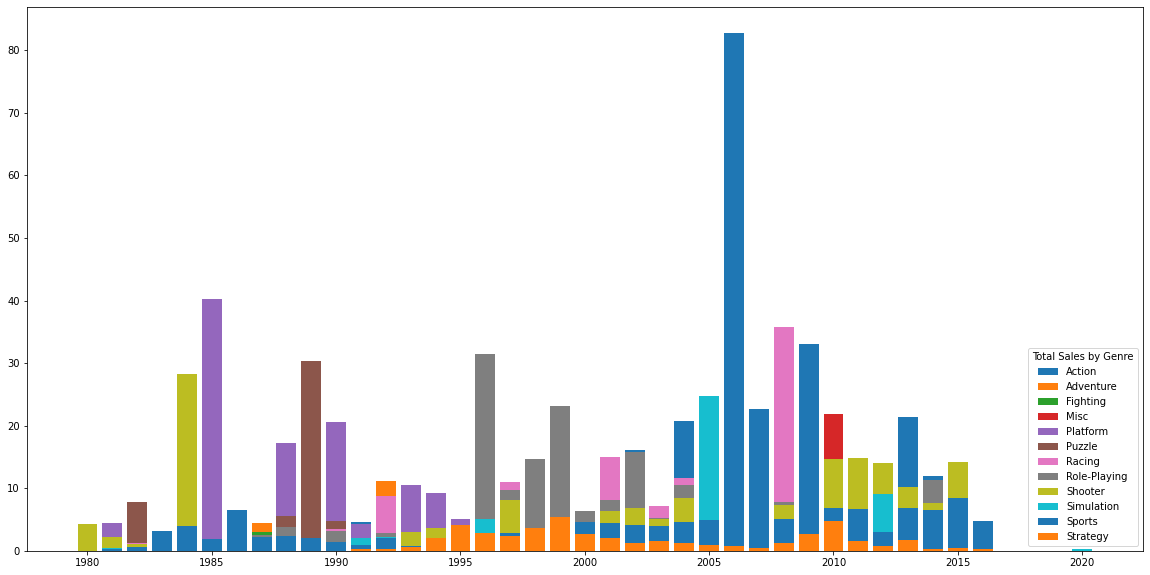

In [10]:
#### 연도에 따른 장르별 총판매량 그래프
fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(1, 1, 1)

genre_list = ['Action', 'Adventure', 'Fighting','Misc', 'Platform','Puzzle', 'Racing', 'Role-Playing','Shooter','Simulation','Sports','Strategy']


for genre in genre_list:  
    genre = df['Genre'] == genre
    ax.bar(df.loc[genre, 'Year']
           ,df.loc[genre, 'total_sales'])
    
ax.legend(genre_list, loc='lower right', title='Total Sales by Genre')
plt.show()
## 장르별로 누적그래프를 그리니 한눈에 알아보기 힘든문제 발생 > 장르 축소 작업 

Text(0.5, 1.0, 'Total Sales by Genre')

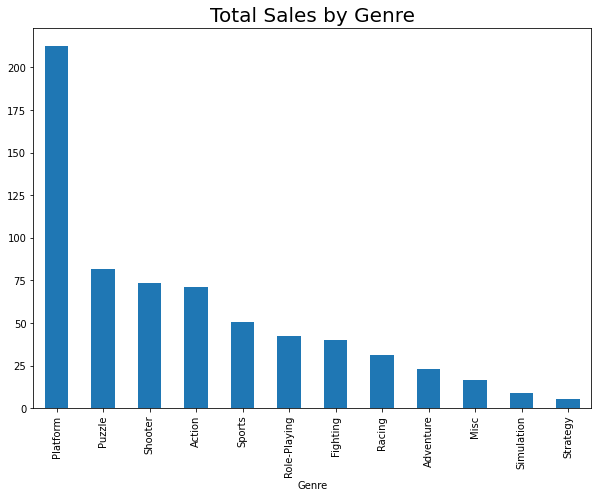

In [24]:
## 장르별 총 판매량 그래프 
## 의미있는 장르 값을 찾기위해 연도를 나누어서 순위 소팅 

## 1995년 미만  
df_95 = df[df['Year'] < 1995]
grp_95_total = df_95.groupby('Genre')['total_sales'].sum().sort_values(ascending=False)
grp_95_total.plot(kind='bar', figsize=(10,7))
plt.title('Total Sales by Genre', fontsize=20)

Text(0.5, 1.0, 'Total Sales by Genre')

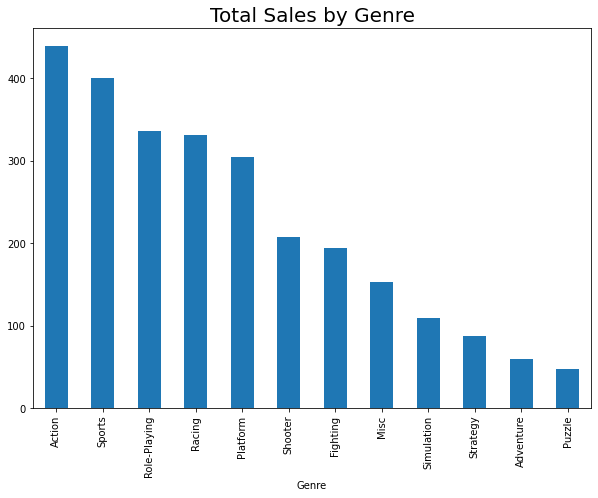

In [26]:
## 1995년 ~2005년  
df_00 = df[(df['Year'] >= 1995) & (df['Year']<2005)]
grp_00_total = df_00.groupby('Genre')['total_sales'].sum().sort_values(ascending=False)
grp_00_total.plot(kind='bar', figsize=(10,7))
plt.title('Total Sales by Genre', fontsize=20)

Text(0.5, 1.0, 'Total Sales by Genre')

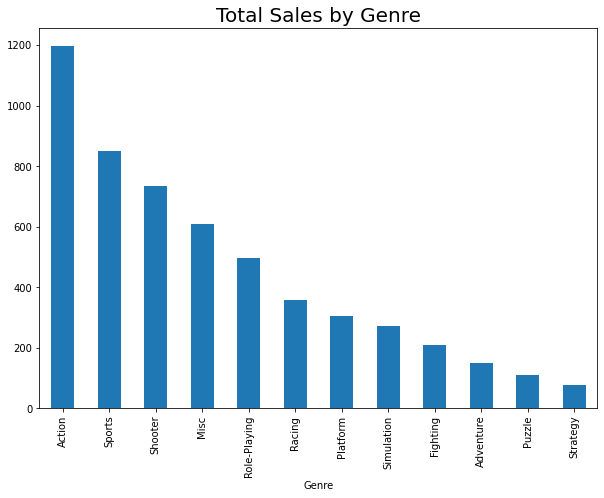

In [27]:
## 2005년 이후 
df_05 = df[df['Year'] >= 2005]
grp_05_total = df_05.groupby('Genre')['total_sales'].sum().sort_values(ascending=False)
grp_05_total.plot(kind='bar', figsize=(10,7))
plt.title('Total Sales by Genre', fontsize=20)


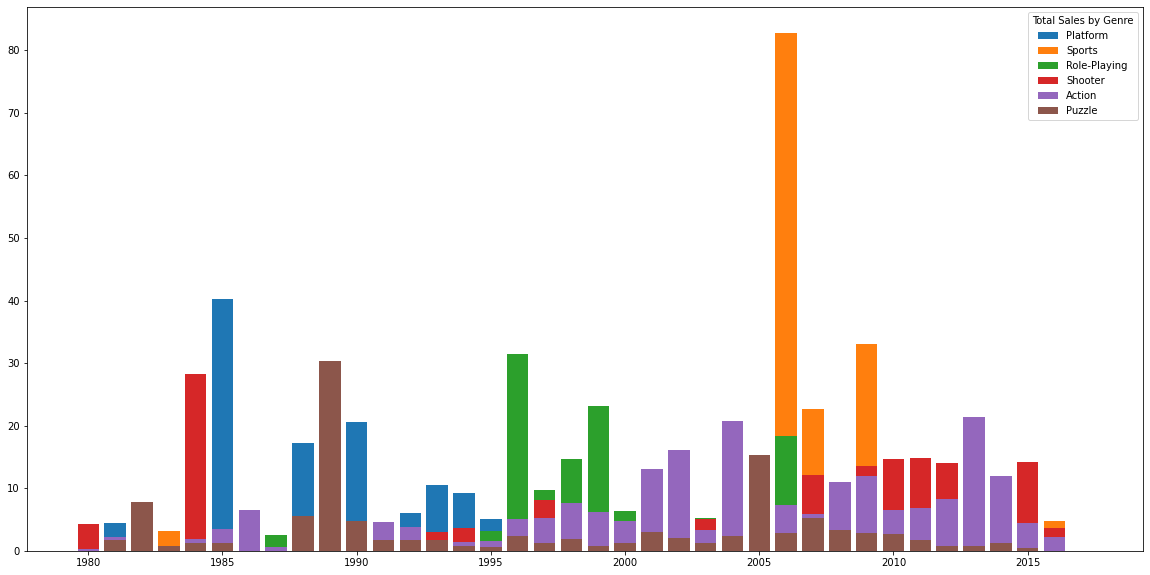

In [29]:
## 위의 그래프를 토대로 연도별 의미있는 상위권 장르 6개만추려냄 
fig = plt.figure(figsize = (20, 10))
ax1 = fig.add_subplot(1, 1, 1)

genre_list6 = ['Platform', 'Sports', 'Role-Playing','Shooter','Action','Puzzle']

for genre in genre_list6:  
    genre = df['Genre'] == genre
    ax1.bar(df.loc[genre, 'Year']
           ,df.loc[genre, 'total_sales'])
    
ax1.legend(genre_list6, loc='upper right', title='Total Sales by Genre')
plt.show()


95년도 이전에는 슈퍼마리오 같은 플랫폼 게임이 대세 

96년도에 첫 포켓몬스터 시리즈 발매로 롤플레잉 게임이 한동안 대세 

2006 닌텐도 위 게임기가 나오면서 위 스포츠가 엄청난 판매량 달성, 그 후 2009년도까지 닌텐도 위 기반 게임인 위 피트, 마리오 카트, 위스포츠 리조트 등이 번갈아 차트에 오름 

슈팅 게임은 2010년 이후로 콜오브듀티 시리즈가 인기 

00년도 이후로 액션게임은 꾸준히 잘팔림

연도별 트렌드를 알아봤으니 다음 분기의 게임을 구상하기 위해 최근 데이터만 남겨 진행 


In [30]:
## 옛날 자료 제외하고 df 생성 
df_lately = df[df['Year'] >= 2014]

# 지역에 따른 장르 선호도

In [31]:
NA_sum = df_lately.groupby('Genre')['NA_Sales'].sum().sum()
EU_sum = df_lately.groupby('Genre')['EU_Sales'].sum().sum()
JP_sum = df_lately.groupby('Genre')['JP_Sales'].sum().sum()

print('북미 총 판매량 합 : ',np.round(NA_sum,1))
print('유럽 총 판매량 합 : ',np.round(EU_sum,1))
print('일본 총 판매량 합 : ',np.round(JP_sum,1),'\n단위 : 백만')

북미 총 판매량 합 :  254.0
유럽 총 판매량 합 :  246.6
일본 총 판매량 합 :  85.6 
단위 : 백만


([<matplotlib.patches.Wedge at 0x7fb042398890>,
 [Text(0.5745246048016344, 0.9380412989189367, 'Action'),
  Text(-0.6162796626587776, 0.911152773904126, 'Adventure'),
  Text(-0.8833703882131692, 0.6554820800205868, 'Fighting'),
  Text(-1.0690244410603493, 0.25920405941190017, 'Misc'),
  Text(-1.0988605755768532, -0.05005432491710387, 'Platform'),
  Text(-1.0827545758707129, -0.19401682512357707, 'Puzzle'),
  Text(-1.0584620353370573, -0.299429657432483, 'Racing'),
  Text(-0.22019062774586365, -1.0777365575375473, 'Role-Playing'),
  Text(0.9147567225091415, -0.6109174564737314, 'Shooter'),
  Text(1.032537057705697, -0.3792983317448977, 'Simulation'),
  Text(1.08555193112213, -0.1776991976262544, 'Sports'),
  Text(1.0995831157156626, -0.03028153947599002, 'Strategy')],
 [Text(0.3133770571645278, 0.5116588903194199, '32.5%'),
  Text(-0.33615254326842414, 0.4969924221295232, '3.9%'),
  Text(-0.4818383935708195, 0.35753568001122915, '6.8%'),
  Text(-0.5831042405783723, 0.14138403240649097, 

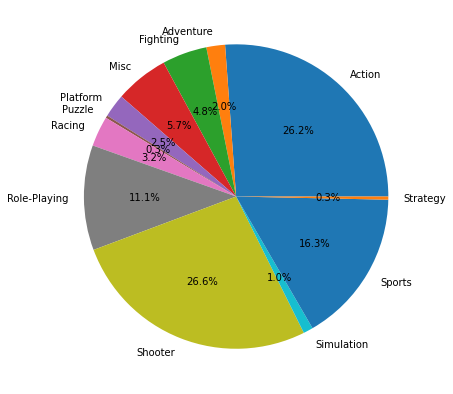

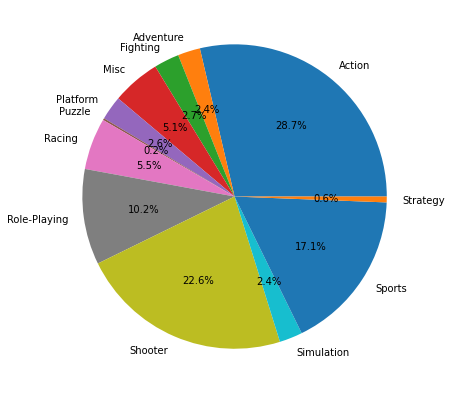

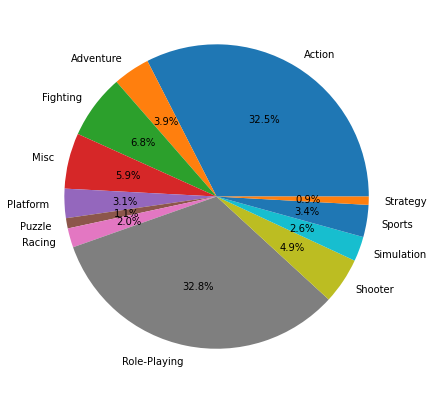

In [32]:
## 지역 장르별 비율 파이차트 
#북미
fig = plt.figure(figsize=(7,7))
ax4= fig.add_subplot(1, 1, 1)
ax4.pie(df_lately.groupby('Genre')['NA_Sales'].sum(),labels = genre_list,autopct='%.1f%%')

#유럽
fig1 = plt.figure(figsize=(7,7))
ax5= fig1.add_subplot(1, 1, 1)
ax5.pie(df_lately.groupby('Genre')['EU_Sales'].sum(),labels = genre_list,autopct='%.1f%%')

#일본 
fig2 = plt.figure(figsize=(7,7))
ax6= fig2.add_subplot(1, 1, 1)
ax6.pie(df_lately.groupby('Genre')['JP_Sales'].sum(),labels = genre_list,autopct='%.1f%%')

# 플랫폼 알아보기 

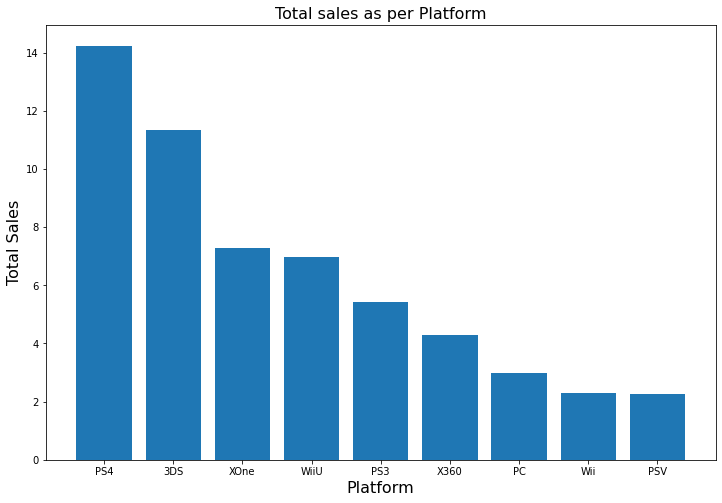

In [37]:
### Top100 게임들의 플랫폼별 판매량 순위
plt.figure(figsize=(12,8))
plt.bar(df_lately.head(100)['Platform'],df_lately.head(100)['total_sales'])
plt.xlabel('Platform',fontsize=16)
plt.ylabel('Total Sales',fontsize=16)
plt.title('Total sales as per Platform',fontsize=16)
plt.show()


# 결론 도출

시장 크기 - 북미 > 유럽 >>> 일본 및 그외 

유행하는 게임 장르 - 북미/유럽 : 액션, 슈터 / 일본 : 롤플레잉, 액션

인기 플랫폼 - ps4, 3DS, xBox one 

**지역별 선호도 차이가 적은 액션장르 게임을 ps4, x box 출시 목표로 **